In [2]:
import numpy as np
import sympy as sp
from sympy.plotting import plot
import matplotlib.pyplot as plt

## Linear Motion
Linear motion, also called **rectilinear motion**, is one-dimensional motion along a straight line, and can therefore be described mathematically using only one spatial dimension. 

The linear motion can be of two types: 
- **uniform linear motion**, with constant velocity (zero acceleration)
- **non-uniform linear motion**, with variable velocity (non-zero acceleration).

### Linear Motion with uniform acceleration

1. **Velocity-time Equation:**
$$ 
v_f = v_i + at 
$$
2. **Displacment-time Equation:**
$$
s = v_it + \frac{1}{2}at^2
$$
3. **Velocity-displacement Equation:**
$$
v^2 = v_i^2 + 2as
$$

|Where: | |
|:----------:|-------------:|
| $\vec{v_i}$ | Initial velocity |
| $\vec{v_f}$ | Final velocity |
| $\Delta v$ | Change in velocity |
| $\vec{a}$ | Acceleration (Change in velocity over time) |
| $\vec{s}$ | Displacement (Change in position) |

In [3]:
vi, vf, dv, a, t, s = sp.symbols(r"\vec{v_i}, \vec{v_f}, \Delta\ v, \vec{a}, t, \vec{s}")

In [4]:
eq_velocity_time = sp.Eq(
    vf, 
    vi + a*t
)
eq_velocity_time

Eq(\vec{v_f}, \vec{a}*t + \vec{v_i})

In [5]:
displacement = vi*t + (1/2)*a*t**2
eq_displacement_time = sp.Eq(
    s, displacement
)
eq_displacement_time

Eq(\vec{s}, 0.5*\vec{a}*t**2 + \vec{v_i}*t)

In [6]:
vfSquared = vi**2 + 2*a*s
eq_velocity_displacement = sp.Eq(
    vf**2,
    vfSquared
)
eq_velocity_displacement

Eq(\vec{v_f}**2, 2*\vec{a}*\vec{s} + \vec{v_i}**2)

In [17]:
sp.solve(
    eq_velocity_displacement, vi
)[0]

-sqrt(-2*\vec{a}*\vec{s} + \vec{v_f}**2)

## Angular Motion
Angular motion deals with circular movement about an axis. Many of the concepts are the same as in linear motion, but we use *radians* as the unit for distance.

An important distinction from linear motion, is that the vectors representing velocity are known as "psuedovectors" or "axial vectors", and they will point along the axis.

However, that's really the only difference and in many cases there is a direct translation between the two. For example, in a pulley system the linear path experienced by the load is directly linked to the angular path along the wheel's circumference:

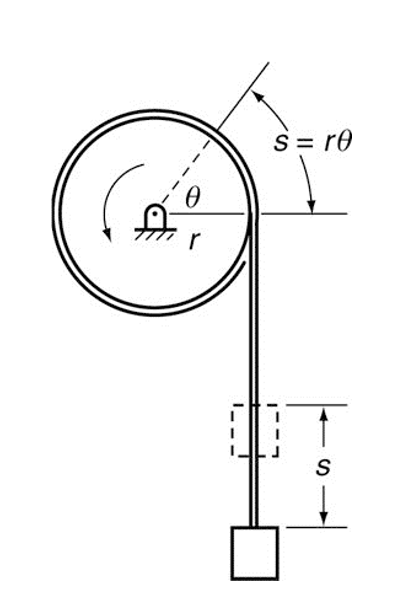

$$
\begin{array}{c c}
  \text{Angular} & \quad \text{Linear} 
  \\[8pt]  
  \omega = \frac{\Delta \theta}{\Delta t} & \quad v = \frac{\Delta s}{\Delta t}
  \\[6pt]
  \alpha = \frac{\Delta \omega}{\Delta t} & \quad a = \frac{\Delta v}{\Delta t}
\end{array}
$$

|Where: | |And: | |
|:----------:|-------------:|:----:|----:|
| $\omega$ | Angular Velocity | $v$ | Linear Velocity |
| $\theta$ | Angular Displacement | $s$ | Linear Displacement |
| $\alpha$ | Angular Acceleration | $a$ | Linear Acceleration |

In [8]:
wi, wf, alpha, theta = sp.symbols(r"\omega_i, \omega_f, \alpha, \theta")

In [9]:
# Representing the three equations with angular symbols.
eq_velocity_time_angular = eq_velocity_time.subs({
    vi: wi, 
    vf:wf,
    a: alpha,
    s: theta
    })

eq_displacement_time_angular = eq_displacement_time.subs({
    vi: wi, 
    vf:wf,
    a: alpha,
    s: theta
})

eq_velocity_displacement_angular = eq_velocity_displacement.subs({
    vi: wi, 
    vf:wf,
    a: alpha,
    s: theta
})

1. **Angular Velocity-time Equation:**
$$ \omega_f = \omega_i + \alpha t $$
2. **Angular Displacment-time Equation:**
$$
\theta = \omega_i t + \frac{1}{2}\alpha t^2
$$
3. **Angular Velocity-displacement Equation:**
$$
\omega_f^2 = \omega_i^2 + 2\alpha \theta
$$

In [10]:
eq_velocity_time_angular

Eq(\omega_f, \alpha*t + \omega_i)

In [11]:
eq_displacement_time_angular

Eq(\theta, 0.5*\alpha*t**2 + \omega_i*t)

In [12]:
eq_velocity_displacement_angular

Eq(\omega_f**2, 2*\alpha*\theta + \omega_i**2)

### Tangential and Normal components

Tangential Velocity:
$$
v_t = \omega r
$$

Tangential Acceleration:
$$
a_t = \alpha r
$$

Normal Acceleration:
$$
a_n = \omega^2 r
$$

Total Acceleration:
$$
\vec{a}_{\Sigma} = \vec{a_t} + \vec{a_n}
$$

|Where: | |
|:----------:|-------------:|
| $r$ | radius |

## Relative Velocity
Relative velocity is the measured from a defined frame of reference.  
Technically, all velocities are relative velocities, but often the frame of reference will be assumed to be a fixed point in space. In this case we call it the absolute velocity ($|\vec{V}|$).

This equation describes the relationship of the relative velocity of two moving points.  
"The **velocity of A relative to B** ($V_{A/B}$) is the velocity of A ($V_A$) *minus* the velocity of B ($V_B$)."

$$
\vec{V_{A/B}} = \vec{V_A} - \vec{V_B}
$$

$$or$$

$$
\vec{V_A} = \vec{V_{A/B}} + \vec{V_B}

## Planar Motion

Planar motion is the movement of an object or system of points in a two-dimensional space, or plane, where all motions occur parallel to that plane. 

Planar motion often 

## Scratch

In [13]:
def p2v(magnitude, degrees):
    """Returns a numpy vector from a given polar format"""
    radians = np.radians(degrees)
    x = magnitude * np.cos(radians)
    y = magnitude * np.sin(radians)
    return np.array([x,y])

def v2p(vector):
    """Returns magnitude and angle (in degrees) from a given numpy vector"""
    magnitude = np.hypot(*vector)  # Equivalent to sqrt(x**2 + y**2)
    degrees = np.degrees(np.arctan2(*vector[::-1]))
    return magnitude, degrees

def rpm2rad_s(rpm):
    rad_m = rpm*2*np.pi
    rad_s = rad_m/60
    return rad_s

In [14]:
rpm2rad_s(66/.9)

7.67944870877505